# Data Analysis for the Biosensors Lab Report

### Conversion to csv

In [9]:
import pandas as pd
import numpy as np

# === Load Sheet ===

results_df = pd.read_csv("labresults.csv", header=0)


### Statistical Analysis

In [11]:
# Keep only first 19 columns (1 label + 18 sample columns)
results_df = results_df.iloc[:, :19]

ebwell_df = results_df.iloc[0:8].copy()
truematrix_df = results_df.iloc[8:16].copy()
accuchek_df = results_df.iloc[16:24].copy()


In [13]:
print("🧪 eBWell:")
print(ebwell_df)


🧪 eBWell:
  Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
0                A* - 70      NaN      5.3      6.3      6.2       NaN   
1                B* - 90      NaN      6.6      NaN      7.5       NaN   
2               C* - 110      NaN      9.4     10.9      9.4       9.1   
3               D* - 130      NaN     10.8      NaN     11.1       NaN   
4              F* - 1000      1.4      2.1      low      2.2       2.3   
5        G* - 90 + Lemon      NaN      8.3      NaN      8.3       8.1   
6               H* - 100      NaN      7.9      NaN      NaN       NaN   
7                    NaN      NaN      NaN      NaN      NaN       NaN   

   Sample 6  Sample 7  Sample 8 Sample 9 Sample 10 Sample 11  Sample 12  \
0       6.0       8.6       NaN      6.4       6.7       6.9        NaN   
1       5.9       9.2       NaN      7.7       7.5       7.3        NaN   
2      13.9      14.6       NaN     10.2      10.1       9.6        NaN   
3      16.7      18.1  

In [14]:

print("\n🧪 True Matrix:")
print(truematrix_df)



🧪 True Matrix:
   Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
8                 A* - 70      NaN      2.6      NaN      3.8       NaN   
9                 B* - 90      NaN      3.2      NaN      3.9       3.8   
10               C* - 110      NaN      5.1      NaN      4.9       NaN   
11               D* - 130      NaN        6      NaN      5.4       5.8   
12              F* - 1000      NaN      low      4.1   error!       NaN   
13        G* - 90 + Lemon      NaN      3.8      NaN      3.6       3.9   
14               H* - 100      NaN      4.5      4.1      NaN       NaN   
15                    NaN      NaN      NaN      NaN      NaN       NaN   

    Sample 6  Sample 7  Sample 8 Sample 9                    Sample 10  \
8        NaN       NaN       NaN      NaN  E-2 error for both machines   
9        NaN       NaN       NaN      3.8                          3.3   
10       NaN       NaN       NaN      4.7                          E-2   
11       NaN

In [15]:

print("\n🧪 Accu-Chek:")
print(accuchek_df)


🧪 Accu-Chek:
   Sample\nglucose(mg/dL) Sample 1 Sample 2 Sample 3 Sample 4  Sample 5  \
16                A* - 70      3.2      3.1      3.1      3.1       NaN   
17                B* - 90      NaN      3.3      NaN      4.1       NaN   
18               C* - 110      4.9        5      NaN      4.9       NaN   
19               D* - 130        6    error        6      6.1       NaN   
20              F* - 1000      Low      1.1      NaN      0.9       1.1   
21        G* - 90 + Lemon        3      4.2      NaN        4       NaN   
22               H* - 100      NaN      4.5      NaN      NaN       NaN   
23                    NaN      NaN      NaN      NaN      NaN       NaN   

    Sample 6  Sample 7  Sample 8   Sample 9 Sample 10 Sample 11  Sample 12  \
16       3.6       NaN       NaN        3.1         3       3.2        NaN   
17       4.2       NaN       NaN        4.1       4.1         4        NaN   
18       5.7       NaN       NaN          5       5.2       5.1        NaN  

In [16]:
reference_map = {
    "A* - 70": 3.9,
    "B* - 90": 5.0,
    "C* - 110": 6.1,
    "D* - 130": 7.2,
    "F* - 1000": 29.2,
    "G* - 90 + Lemon": 5.0,
    "H* - 100": np.nan  # optional: or guess it
}

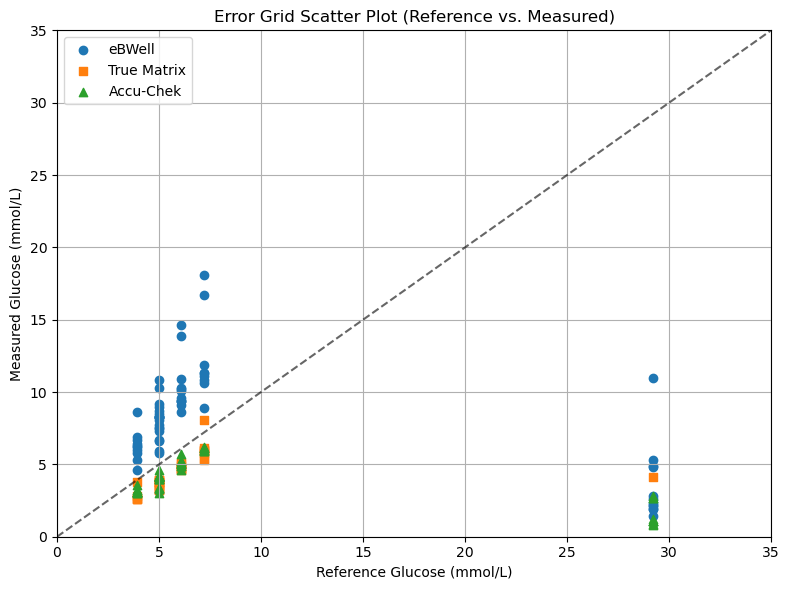

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV
results_df = pd.read_csv("labresults.csv", usecols=range(19))  # Trim to 18 samples + label

# Split into blocks
ebwell_df = results_df.iloc[0:8].copy()
truematrix_df = results_df.iloc[8:16].copy()
accuchek_df = results_df.iloc[16:24].copy()

# Set row labels as index
for df in [ebwell_df, truematrix_df, accuchek_df]:
    df.set_index(df.columns[0], inplace=True)

# Reference map (mmol/L)
reference_map = {
    "A* - 70": 3.9,
    "B* - 90": 5.0,
    "C* - 110": 6.1,
    "D* - 130": 7.2,
    "F* - 1000": 29.2,
    "G* - 90 + Lemon": 5.0
}

# Convert strings to floats, ignore invalid entries
def clean_numeric(df):
    return df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

ebwell_clean = clean_numeric(ebwell_df)
truematrix_clean = clean_numeric(truematrix_df)
accuchek_clean = clean_numeric(accuchek_df)

# Function to build (reference, measured) arrays
def get_ref_and_measured(df_clean):
    ref_vals = []
    measured_vals = []
    for index, row in df_clean.iterrows():
        if index not in reference_map:
            continue
        ref = reference_map[index]
        for val in row.dropna():
            ref_vals.append(ref)
            measured_vals.append(val)
    return np.array(ref_vals), np.array(measured_vals)

# Get data
ref_eb, meas_eb = get_ref_and_measured(ebwell_clean)
ref_tm, meas_tm = get_ref_and_measured(truematrix_clean)
ref_ac, meas_ac = get_ref_and_measured(accuchek_clean)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
plt.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
plt.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")
plt.plot([0, 35], [0, 35], 'k--', alpha=0.6)  # identity line
plt.xlabel("Reference Glucose (mmol/L)")
plt.ylabel("Measured Glucose (mmol/L)")
plt.title("Error Grid Scatter Plot (Reference vs. Measured)")
plt.legend()
plt.grid(True)
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.tight_layout()
plt.show()


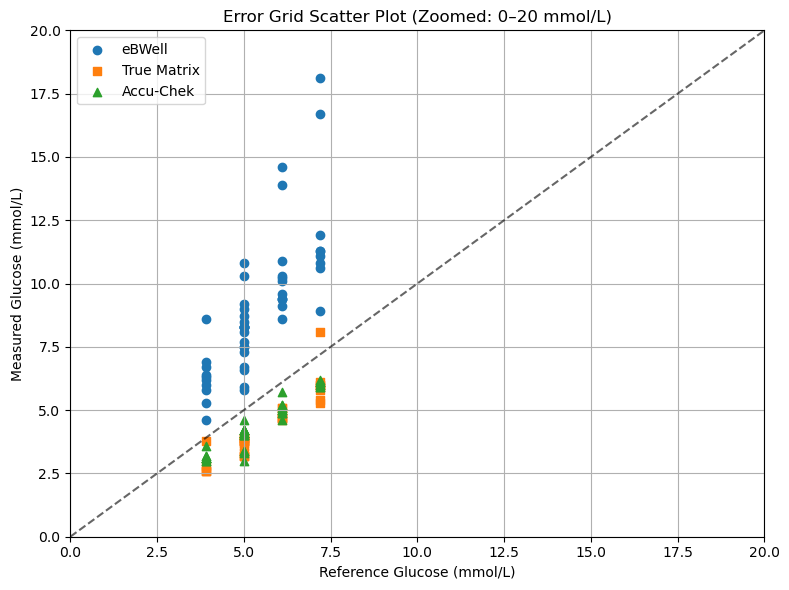

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
plt.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
plt.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")
plt.plot([0, 20], [0, 20], 'k--', alpha=0.6)  # identity line
plt.xlabel("Reference Glucose (mmol/L)")
plt.ylabel("Measured Glucose (mmol/L)")
plt.title("Error Grid Scatter Plot (Zoomed: 0–20 mmol/L)")
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


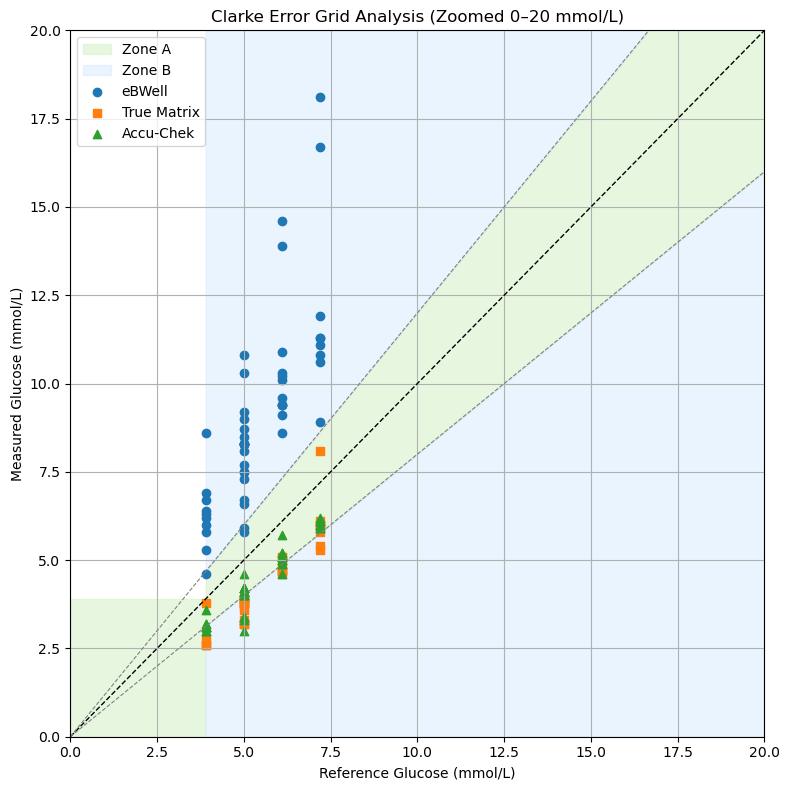

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_clarke_zones(ax):
    # Draw Clarke Zones (converted to mmol/L)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)

    # Zone A region — within 20% or both < 3.9
    x = np.linspace(0, 20, 1000)
    ax.plot(x, x, 'k--', linewidth=1)  # identity line
    ax.plot(x, x * 1.2, 'gray', linestyle='--', linewidth=0.8)
    ax.plot(x, x * 0.8, 'gray', linestyle='--', linewidth=0.8)

    # Fill Zone A (between 0.8x and 1.2x lines OR both under 3.9)
    ax.fill_between(x, x * 0.8, x * 1.2, where=(x >= 3.9), color='#d0f0c0', label="Zone A", alpha=0.5)
    ax.fill_between(x, 0, 3.9, where=(x <= 3.9), color='#d0f0c0', alpha=0.5)

    # Zone B — adjacent to A (light blue)
    ax.fill_between(x, x * 1.2, 20, where=(x >= 3.9), color='#cce5ff', label="Zone B", alpha=0.4)
    ax.fill_between(x, 0, x * 0.8, where=(x >= 3.9), color='#cce5ff', alpha=0.4)

    # You can add more Zones (C, D, E) if needed, but A & B are most critical

# === PLOT ===
plt.figure(figsize=(8, 8))
ax = plt.gca()
plot_clarke_zones(ax)

# Plot the actual data
ax.scatter(ref_eb, meas_eb, label="eBWell", marker="o")
ax.scatter(ref_tm, meas_tm, label="True Matrix", marker="s")
ax.scatter(ref_ac, meas_ac, label="Accu-Chek", marker="^")

ax.set_xlabel("Reference Glucose (mmol/L)")
ax.set_ylabel("Measured Glucose (mmol/L)")
ax.set_title("Clarke Error Grid Analysis (Zoomed 0–20 mmol/L)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Solution Comparison ===
                       eBWell Mean  TrueMatrix Mean  Accu-Chek Mean  \
Solution                                                              
C* (110 mg/dL)           10.458333         4.828571        5.063636   
F* (1000 mg/dL)           3.600000         4.100000        1.550000   
G* (90 mg/dL + Lemon)     8.809091         3.800000        4.060000   

                       eBWell CV (%) TrueMatrix CV (%)  Accu-Chek CV (%)  
Solution                                                                  
C* (110 mg/dL)             17.960083          4.263504          5.319154  
F* (1000 mg/dL)            74.413155               N/A         53.223091  
G* (90 mg/dL + Lemon)      10.235048          3.223013         10.068775  

=== Overall Performance ===
                      eBWell  TrueMatrix  Accu-Chek
Metric                                             
Accuracy (MARD %)  69.388678   25.592604  32.161070
Overall CV (%)     23.923791    8.911054  12.493871
Cla

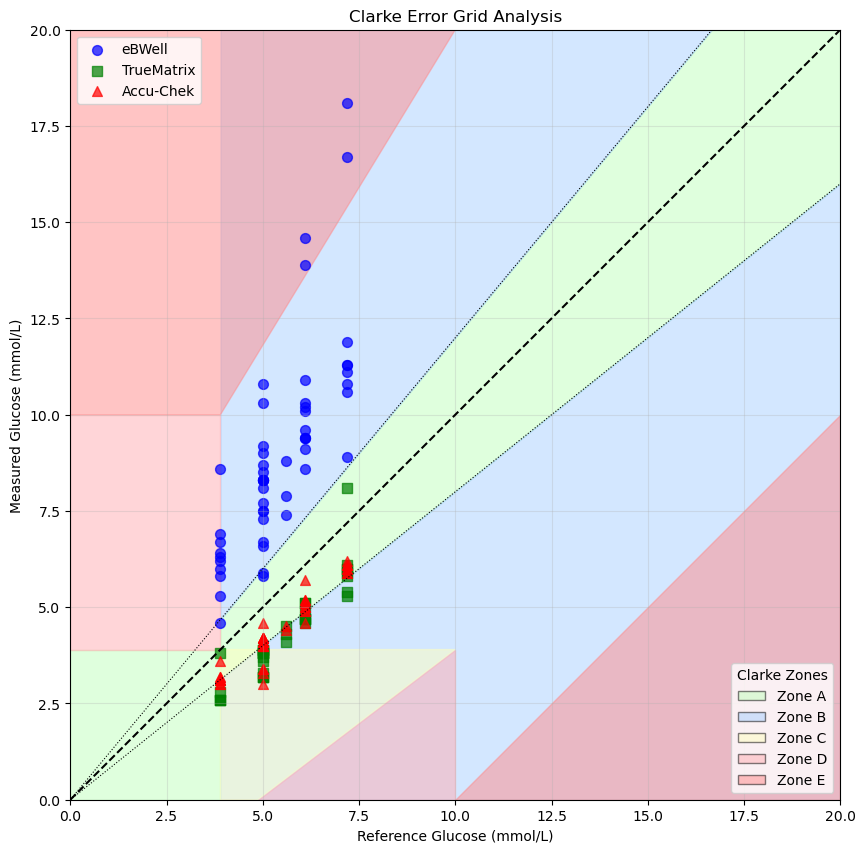

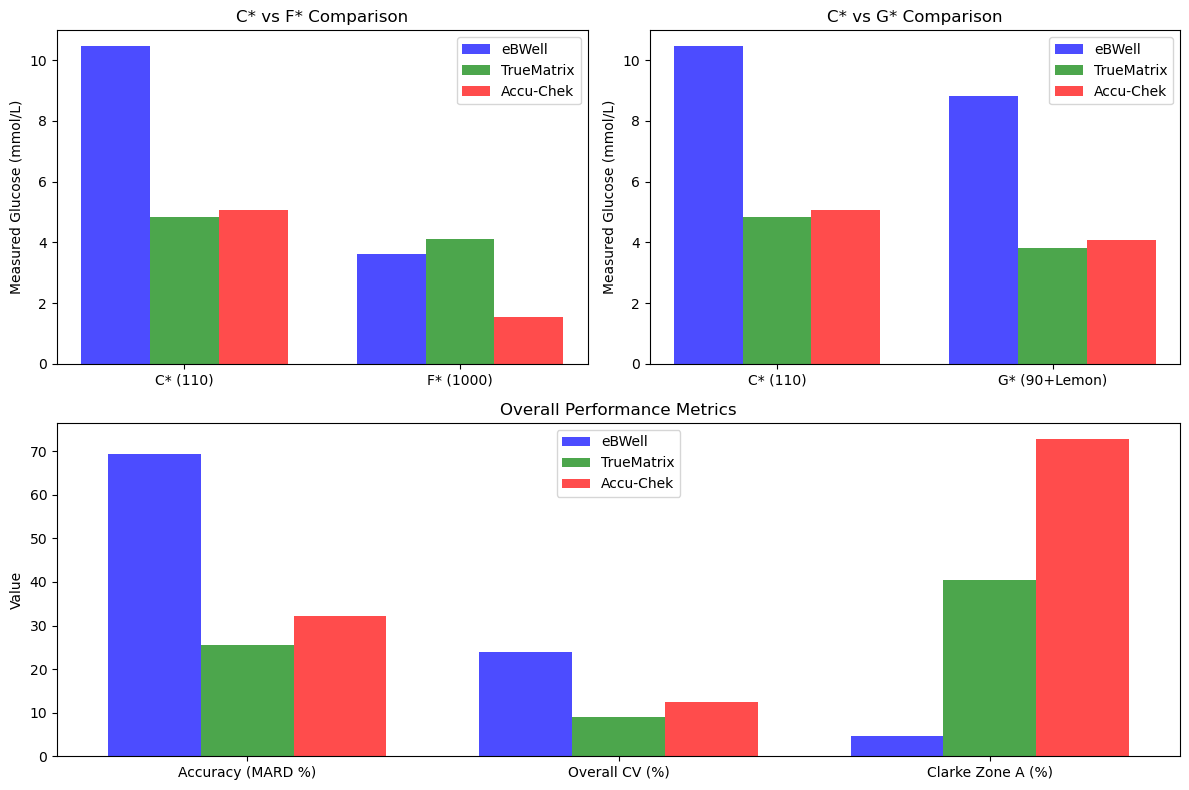

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Load your CSV
results_df = pd.read_csv("labresults.csv", usecols=range(19))  # Trim to 18 samples + label

# Split into blocks
ebwell_df = results_df.iloc[0:8].copy()
truematrix_df = results_df.iloc[8:16].copy()
accuchek_df = results_df.iloc[16:24].copy()

# Set row labels as index
for df in [ebwell_df, truematrix_df, accuchek_df]:
    df.set_index(df.columns[0], inplace=True)

# Reference map (mmol/L)
reference_map = {
    "A* - 70": 3.9,
    "B* - 90": 5.0,
    "C* - 110": 6.1,
    "D* - 130": 7.2,
    "F* - 1000": 55.5,  # Extreme high glucose
    "G* - 90 + Lemon": 5.0,  # Same as B* but with lemon
    "H* - 100": 5.6  # Additional reference
}

# Convert strings to floats, ignore invalid entries
def clean_numeric(df):
    return df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

ebwell_clean = clean_numeric(ebwell_df)
truematrix_clean = clean_numeric(truematrix_df)
accuchek_clean = clean_numeric(accuchek_df)

# Function to build (reference, measured) arrays
def get_ref_and_measured(df_clean):
    ref_vals = []
    measured_vals = []
    for index, row in df_clean.iterrows():
        if index not in reference_map:
            continue
        ref = reference_map[index]
        for val in row.dropna():
            ref_vals.append(ref)
            measured_vals.append(val)
    return np.array(ref_vals), np.array(measured_vals)

# Get data
ref_eb, meas_eb = get_ref_and_measured(ebwell_clean)
ref_tm, meas_tm = get_ref_and_measured(truematrix_clean)
ref_ac, meas_ac = get_ref_and_measured(accuchek_clean)

# Basic statistics functions
def calculate_accuracy(reference, measured):
    """Calculate MARD (Mean Absolute Relative Difference)"""
    return np.mean(np.abs(measured - reference) / reference) * 100

def calculate_precision(df, solution_name):
    """Calculate CV for a specific solution"""
    if solution_name in df.index:
        values = df.loc[solution_name].dropna().values
        if len(values) >= 2:
            return np.std(values, ddof=1) / np.mean(values) * 100
    return None

# Draw Clarke Error Grid
def draw_clarke_grid(ax):
    """Draw Clarke Error Grid with zones A-E"""
    # Convert key thresholds from mg/dL to mmol/L
    boundary_70 = 3.9  # ~70 mg/dL
    boundary_180 = 10.0  # ~180 mg/dL
    max_value = 20  # mmol/L
    
    # Draw diagonal line (line of identity)
    x = np.linspace(0, max_value, 1000)
    ax.plot(x, x, 'k--', linewidth=1.5)
    
    # Draw 20% error lines
    ax.plot(x, x * 1.2, 'k:', linewidth=0.8)
    ax.plot(x, x * 0.8, 'k:', linewidth=0.8)
    
    # Zone A (green)
    ax.fill_between(x, x * 0.8, x * 1.2, where=(x >= boundary_70), 
                   color='#c1ffbd', alpha=0.5)
    ax.fill_between(x, 0, boundary_70, where=(x <= boundary_70), 
                   color='#c1ffbd', alpha=0.5)
    
    # Zone B (blue)
    ax.fill_between(x, x * 1.2, max_value, where=(x >= boundary_70), 
                  color='#a8d0ff', alpha=0.5)
    ax.fill_between(x, 0, x * 0.8, where=(x >= boundary_70), 
                  color='#a8d0ff', alpha=0.5)
    
    # Zone C (yellow)
    c_lower = ax.add_patch(patches.Polygon(
        [[boundary_70, 0], [boundary_70, boundary_70], [boundary_180, boundary_70], 
         [boundary_70/0.8, 0]], closed=True, color='#ffffc0', alpha=0.5))
    
    # Zone D (light red)
    d_lower = ax.add_patch(patches.Polygon(
        [[0, boundary_70], [boundary_70, boundary_70], [boundary_70, boundary_180], 
         [0, boundary_180]], closed=True, color='#ffadb3', alpha=0.5))
    d_upper = ax.add_patch(patches.Polygon(
        [[boundary_70/0.8, 0], [boundary_180, 0], [boundary_180, boundary_70]], 
        closed=True, color='#ffadb3', alpha=0.5))
    
    # Zone E (dark red)
    e_upper = ax.add_patch(patches.Polygon(
        [[0, boundary_180], [0, max_value], [boundary_180, max_value], 
         [boundary_70, boundary_180]], closed=True, color='#ff8a8a', alpha=0.5))
    e_lower = ax.add_patch(patches.Polygon(
        [[boundary_180, 0], [max_value, 0], [max_value, boundary_180]], 
        closed=True, color='#ff8a8a', alpha=0.5))
    
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, max_value)
    ax.set_aspect('equal')

def plot_clarke_subplot(ax, ref, meas, label, color, marker, show_legend=False):
    draw_clarke_grid(ax)
    ax.scatter(ref, meas, label=label, color=color, marker=marker, s=50, alpha=0.7)

    if show_legend:
        ax.legend(loc='upper left')

    ax.set_xlabel('Reference Glucose (mmol/L)')
    ax.set_ylabel('Measured Glucose (mmol/L)')
    ax.set_title(f'Clarke Error Grid: {label}')
    ax.grid(True, alpha=0.3)

    # Add Clarke Zone legend
    zone_patches = [
        Patch(facecolor='#c1ffbd', edgecolor='black', alpha=0.5, label='Zone A'),
        Patch(facecolor='#a8d0ff', edgecolor='black', alpha=0.5, label='Zone B'),
        Patch(facecolor='#ffffc0', edgecolor='black', alpha=0.5, label='Zone C'),
        Patch(facecolor='#ffadb3', edgecolor='black', alpha=0.5, label='Zone D'),
        Patch(facecolor='#ff8a8a', edgecolor='black', alpha=0.5, label='Zone E')
    ]
    zone_legend = ax.legend(handles=zone_patches, title="Clarke Zones", loc='lower right', frameon=True)
    ax.add_artist(zone_legend)

from matplotlib.patches import Patch

# Create Error Grid Analysis Plot
fig, ax = plt.subplots(figsize=(10, 10))
draw_clarke_grid(ax)

# Existing data legend
ax.legend(loc='upper left')

# Zone color legend patches
zone_patches = [
    Patch(facecolor='#c1ffbd', edgecolor='black', alpha=0.5, label='Zone A'),
    Patch(facecolor='#a8d0ff', edgecolor='black', alpha=0.5, label='Zone B'),
    Patch(facecolor='#ffffc0', edgecolor='black', alpha=0.5, label='Zone C'),
    Patch(facecolor='#ffadb3', edgecolor='black', alpha=0.5, label='Zone D'),
    Patch(facecolor='#ff8a8a', edgecolor='black', alpha=0.5, label='Zone E')
]

# Add second legend for zone colors
zone_legend = ax.legend(handles=zone_patches, title="Clarke Zones", loc='lower right', frameon=True)
ax.add_artist(zone_legend)

# Plot the data points
ax.scatter(ref_eb, meas_eb, marker='o', color='blue', label='eBWell', s=50, alpha=0.7)
ax.scatter(ref_tm, meas_tm, marker='s', color='green', label='TrueMatrix', s=50, alpha=0.7)
ax.scatter(ref_ac, meas_ac, marker='^', color='red', label='Accu-Chek', s=50, alpha=0.7)

# Add legend and labels
ax.legend(loc='upper left')
ax.set_xlabel('Reference Glucose (mmol/L)')
ax.set_ylabel('Measured Glucose (mmol/L)')
ax.set_title('Clarke Error Grid Analysis')
ax.grid(True, alpha=0.3)

# Save the Clarke Error Grid
plt.savefig('clarke_error_grid.png', dpi=300)

# Analysis of F* vs C* and G* vs C*
# Extract data for specific solutions
def get_solution_data(df, solution_name):
    if solution_name in df.index:
        return df.loc[solution_name].dropna().values
    return np.array([])

# Get data for C*, F*, and G*
c_eb = get_solution_data(ebwell_clean, "C* - 110")
f_eb = get_solution_data(ebwell_clean, "F* - 1000")
g_eb = get_solution_data(ebwell_clean, "G* - 90 + Lemon")

c_tm = get_solution_data(truematrix_clean, "C* - 110")
f_tm = get_solution_data(truematrix_clean, "F* - 1000")
g_tm = get_solution_data(truematrix_clean, "G* - 90 + Lemon")

c_ac = get_solution_data(accuchek_clean, "C* - 110")
f_ac = get_solution_data(accuchek_clean, "F* - 1000")
g_ac = get_solution_data(accuchek_clean, "G* - 90 + Lemon")

# Calculate statistics for comparison
comparison_data = {
    'Solution': ['C* (110 mg/dL)', 'F* (1000 mg/dL)', 'G* (90 mg/dL + Lemon)'],
    'eBWell Mean': [np.mean(c_eb) if len(c_eb) > 0 else 'N/A', 
                   np.mean(f_eb) if len(f_eb) > 0 else 'N/A',
                   np.mean(g_eb) if len(g_eb) > 0 else 'N/A'],
    'TrueMatrix Mean': [np.mean(c_tm) if len(c_tm) > 0 else 'N/A', 
                       np.mean(f_tm) if len(f_tm) > 0 else 'N/A',
                       np.mean(g_tm) if len(g_tm) > 0 else 'N/A'],
    'Accu-Chek Mean': [np.mean(c_ac) if len(c_ac) > 0 else 'N/A', 
                      np.mean(f_ac) if len(f_ac) > 0 else 'N/A',
                      np.mean(g_ac) if len(g_ac) > 0 else 'N/A'],
    'eBWell CV (%)': [calculate_precision(ebwell_clean, "C* - 110") or 'N/A',
                     calculate_precision(ebwell_clean, "F* - 1000") or 'N/A',
                     calculate_precision(ebwell_clean, "G* - 90 + Lemon") or 'N/A'],
    'TrueMatrix CV (%)': [calculate_precision(truematrix_clean, "C* - 110") or 'N/A',
                         calculate_precision(truematrix_clean, "F* - 1000") or 'N/A',
                         calculate_precision(truematrix_clean, "G* - 90 + Lemon") or 'N/A'],
    'Accu-Chek CV (%)': [calculate_precision(accuchek_clean, "C* - 110") or 'N/A',
                        calculate_precision(accuchek_clean, "F* - 1000") or 'N/A',
                        calculate_precision(accuchek_clean, "G* - 90 + Lemon") or 'N/A']
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Solution', inplace=True)

# Display the comparison
print("\n=== Solution Comparison ===")
print(comparison_df)

# Overall performance metrics
performance_data = {
    'Metric': ['Accuracy (MARD %)', 'Overall CV (%)', 'Clarke Zone A (%)'],
    'eBWell': [calculate_accuracy(ref_eb, meas_eb),
              np.mean([v for v in [calculate_precision(ebwell_clean, idx) for idx in ebwell_clean.index] if v is not None]),
              sum((ref_eb <= 3.9) & (meas_eb <= 3.9) | 
                 ((meas_eb <= 1.2*ref_eb) & (meas_eb >= 0.8*ref_eb))) / len(ref_eb) * 100],
    'TrueMatrix': [calculate_accuracy(ref_tm, meas_tm),
                  np.mean([v for v in [calculate_precision(truematrix_clean, idx) for idx in truematrix_clean.index] if v is not None]),
                  sum((ref_tm <= 3.9) & (meas_tm <= 3.9) | 
                     ((meas_tm <= 1.2*ref_tm) & (meas_tm >= 0.8*ref_tm))) / len(ref_tm) * 100],
    'Accu-Chek': [calculate_accuracy(ref_ac, meas_ac),
                 np.mean([v for v in [calculate_precision(accuchek_clean, idx) for idx in accuchek_clean.index] if v is not None]),
                 sum((ref_ac <= 3.9) & (meas_ac <= 3.9) | 
                    ((meas_ac <= 1.2*ref_ac) & (meas_ac >= 0.8*ref_ac))) / len(ref_ac) * 100]
}

performance_df = pd.DataFrame(performance_data)
performance_df.set_index('Metric', inplace=True)

# Display the performance metrics
print("\n=== Overall Performance ===")
print(performance_df)

# Save results to CSV
comparison_df.to_csv("solution_comparison.csv")
performance_df.to_csv("performance_metrics.csv")

# Create comparison visualizations
plt.figure(figsize=(12, 8))

# Plot C* vs F* for each device
plt.subplot(2, 2, 1)
labels = ['C* (110)', 'F* (1000)']
eb_values = [np.mean(c_eb) if len(c_eb) > 0 else 0, 
            np.mean(f_eb) if len(f_eb) > 0 else 0]
tm_values = [np.mean(c_tm) if len(c_tm) > 0 else 0, 
            np.mean(f_tm) if len(f_tm) > 0 else 0]
ac_values = [np.mean(c_ac) if len(c_ac) > 0 else 0, 
            np.mean(f_ac) if len(f_ac) > 0 else 0]

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, eb_values, width, label='eBWell', color='blue', alpha=0.7)
plt.bar(x, tm_values, width, label='TrueMatrix', color='green', alpha=0.7)
plt.bar(x + width, ac_values, width, label='Accu-Chek', color='red', alpha=0.7)

plt.ylabel('Measured Glucose (mmol/L)')
plt.title('C* vs F* Comparison')
plt.xticks(x, labels)
plt.legend()

# Plot C* vs G* for each device
plt.subplot(2, 2, 2)
labels = ['C* (110)', 'G* (90+Lemon)']
eb_values = [np.mean(c_eb) if len(c_eb) > 0 else 0, 
            np.mean(g_eb) if len(g_eb) > 0 else 0]
tm_values = [np.mean(c_tm) if len(c_tm) > 0 else 0, 
            np.mean(g_tm) if len(g_tm) > 0 else 0]
ac_values = [np.mean(c_ac) if len(c_ac) > 0 else 0, 
            np.mean(g_ac) if len(g_ac) > 0 else 0]

x = np.arange(len(labels))

plt.bar(x - width, eb_values, width, label='eBWell', color='blue', alpha=0.7)
plt.bar(x, tm_values, width, label='TrueMatrix', color='green', alpha=0.7)
plt.bar(x + width, ac_values, width, label='Accu-Chek', color='red', alpha=0.7)

plt.ylabel('Measured Glucose (mmol/L)')
plt.title('C* vs G* Comparison')
plt.xticks(x, labels)
plt.legend()

# Plot overall performance metrics
plt.subplot(2, 1, 2)
metrics = ['Accuracy (MARD %)', 'Overall CV (%)', 'Clarke Zone A (%)']
eb_metrics = [performance_df.loc[metric, 'eBWell'] for metric in metrics]
tm_metrics = [performance_df.loc[metric, 'TrueMatrix'] for metric in metrics]
ac_metrics = [performance_df.loc[metric, 'Accu-Chek'] for metric in metrics]

x = np.arange(len(metrics))

plt.bar(x - width, eb_metrics, width, label='eBWell', color='blue', alpha=0.7)
plt.bar(x, tm_metrics, width, label='TrueMatrix', color='green', alpha=0.7)
plt.bar(x + width, ac_metrics, width, label='Accu-Chek', color='red', alpha=0.7)

plt.ylabel('Value')
plt.title('Overall Performance Metrics')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('comparison_analysis.png', dpi=300)
plt.show()

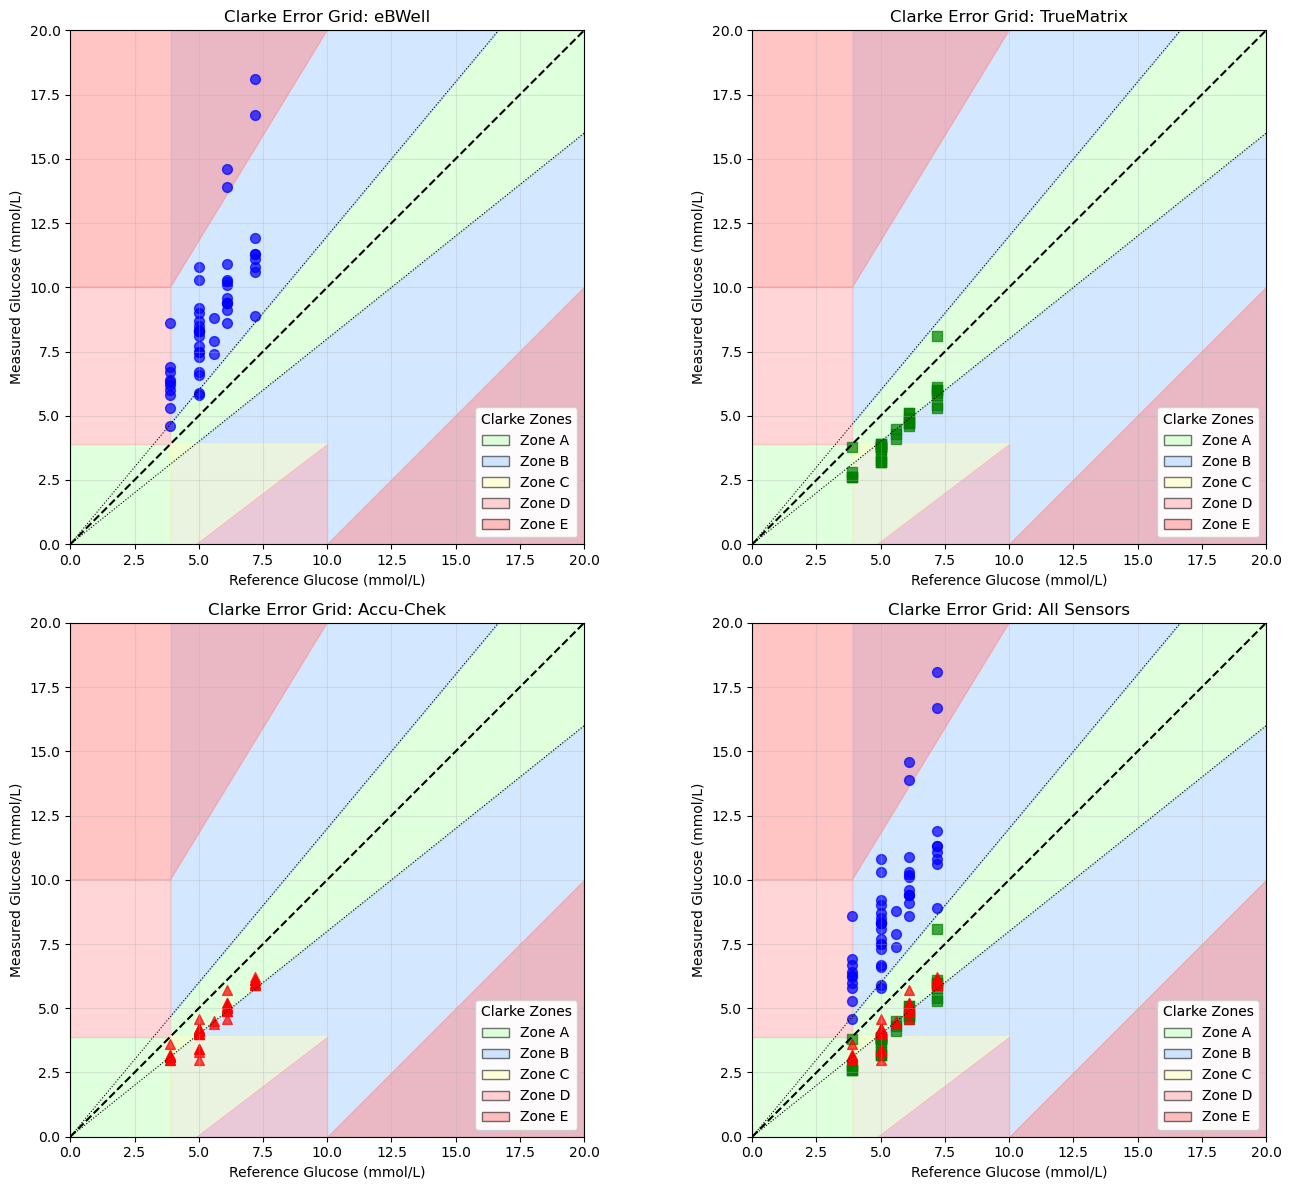

In [47]:
# Create 2x2 grid of Clarke plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Individual sensor plots
plot_clarke_subplot(axs[0, 0], ref_eb, meas_eb, 'eBWell', 'blue', 'o', show_legend=True)
plot_clarke_subplot(axs[0, 1], ref_tm, meas_tm, 'TrueMatrix', 'green', 's', show_legend=True)
plot_clarke_subplot(axs[1, 0], ref_ac, meas_ac, 'Accu-Chek', 'red', '^', show_legend=True)

# Combined plot
axs[1, 1].set_title("Clarke Error Grid: All Sensors")
draw_clarke_grid(axs[1, 1])
axs[1, 1].scatter(ref_eb, meas_eb, label='eBWell', color='blue', marker='o', s=50, alpha=0.7)
axs[1, 1].scatter(ref_tm, meas_tm, label='TrueMatrix', color='green', marker='s', s=50, alpha=0.7)
axs[1, 1].scatter(ref_ac, meas_ac, label='Accu-Chek', color='red', marker='^', s=50, alpha=0.7)
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].set_xlabel('Reference Glucose (mmol/L)')
axs[1, 1].set_ylabel('Measured Glucose (mmol/L)')

# Add zone color legend to combined plot
zone_legend = axs[1, 1].legend(
    handles=[
        Patch(facecolor='#c1ffbd', edgecolor='black', alpha=0.5, label='Zone A'),
        Patch(facecolor='#a8d0ff', edgecolor='black', alpha=0.5, label='Zone B'),
        Patch(facecolor='#ffffc0', edgecolor='black', alpha=0.5, label='Zone C'),
        Patch(facecolor='#ffadb3', edgecolor='black', alpha=0.5, label='Zone D'),
        Patch(facecolor='#ff8a8a', edgecolor='black', alpha=0.5, label='Zone E')
    ],
    title="Clarke Zones", loc='lower right', frameon=True
)
axs[1, 1].add_artist(zone_legend)

plt.tight_layout()
plt.savefig('clarke_2x2_subplots.png', dpi=300)
plt.show()


In [48]:
def clarke_zone_percentages(ref, meas):
    """Calculate percentage of points in each Clarke zone (A–E)"""
    ref = np.array(ref)
    meas = np.array(meas)

    total = len(ref)
    if total == 0:
        return {zone: 0 for zone in 'ABCDE'}

    # Zone A: within 20% of ref or both hypoglycemic (<3.9)
    zone_A = (((meas >= 0.8 * ref) & (meas <= 1.2 * ref)) | ((ref < 3.9) & (meas < 3.9)))
    
    # Zone B: outside 20% but not leading to wrong clinical action
    zone_B = ~zone_A & (
        ((ref > 3.9) & (meas > 3.9)) |
        ((ref < 3.9) & (meas >= 3.9)) |
        ((ref >= 3.9) & (meas < 3.9))
    )

    # Zone E: dangerous opposite decisions
    zone_E = ((ref >= 3.9) & (meas < 3.9)) | ((ref < 3.9) & (meas >= 3.9))

    # Zone C: overcorrection of acceptable BG
    zone_C = (ref >= 3.9) & ((meas <= 0.8 * ref) | (meas >= 1.2 * ref)) & ~zone_E

    # Zone D: failure to detect hypo/hyperglycemia
    zone_D = ~zone_A & ~zone_B & ~zone_C & ~zone_E

    # Combine into dictionary
    percentages = {
        'A': 100 * np.sum(zone_A) / total,
        'B': 100 * np.sum(zone_B) / total,
        'C': 100 * np.sum(zone_C) / total,
        'D': 100 * np.sum(zone_D) / total,
        'E': 100 * np.sum(zone_E) / total
    }

    return percentages


In [49]:
print("\n=== Clarke Zone Distribution ===")
for name, ref, meas in [
    ("eBWell", ref_eb, meas_eb),
    ("TrueMatrix", ref_tm, meas_tm),
    ("Accu-Chek", ref_ac, meas_ac)
]:
    zone_pct = clarke_zone_percentages(ref, meas)
    print(f"\n{name}:")
    for zone in 'ABCDE':
        print(f"  Zone {zone}: {zone_pct[zone]:.1f}%")



=== Clarke Zone Distribution ===

eBWell:
  Zone A: 4.5%
  Zone B: 81.8%
  Zone C: 83.3%
  Zone D: 0.0%
  Zone E: 12.1%

TrueMatrix:
  Zone A: 29.7%
  Zone B: 62.2%
  Zone C: 32.4%
  Zone D: 0.0%
  Zone E: 40.5%

Accu-Chek:
  Zone A: 61.0%
  Zone B: 39.0%
  Zone C: 8.5%
  Zone D: 0.0%
  Zone E: 40.7%


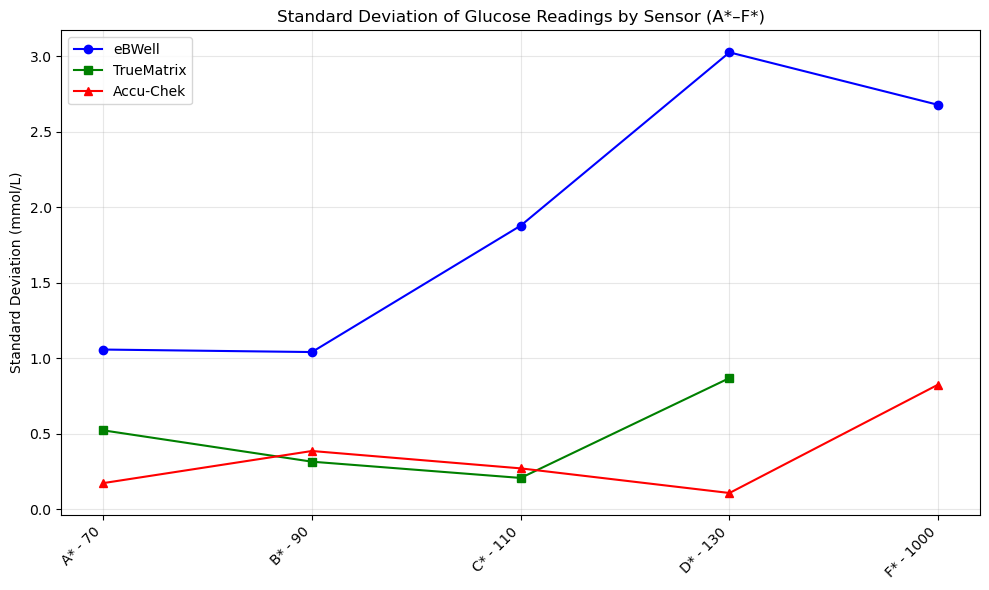

In [51]:
# Define cutoff keys (up to and including F*)
included_keys = ["A* - 70", "B* - 90", "C* - 110", "D* - 130", "F* - 1000"]

# Calculate std deviations
ebwell_std = ebwell_clean.std(axis=1).loc[included_keys]
truematrix_std = truematrix_clean.std(axis=1).loc[included_keys]
accuchek_std = accuchek_clean.std(axis=1).loc[included_keys]

# X-axis labels
solutions = included_keys

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(solutions, ebwell_std.values, marker='o', label='eBWell', color='blue')
plt.plot(solutions, truematrix_std.values, marker='s', label='TrueMatrix', color='green')
plt.plot(solutions, accuchek_std.values, marker='^', label='Accu-Chek', color='red')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Standard Deviation (mmol/L)')
plt.title('Standard Deviation of Glucose Readings by Sensor (A*–F*)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('stddev_limited_AF_plot.png', dpi=300)
plt.show()


In [54]:
def summarize_errors_and_counts(df_raw, sensor_name):
    summary = []
    for solution in df_raw.index:
        row = df_raw.loc[solution]
        total = row.shape[0]

        # Identify non-empty entries
        non_empty = row[row != ""]
        numeric = pd.to_numeric(non_empty, errors='coerce')

        valid_count = numeric.notna().sum()
        error_count = (non_empty.notna() & numeric.isna()).sum()  # non-empty but not numeric

        summary.append({
            'Sensor': sensor_name,
            'Solution': solution,
            'Valid Readings': valid_count,
            'Error Readings': error_count
        })
    return pd.DataFrame(summary)


In [55]:
# Apply to all three sensors
summary_eb = summarize_errors_and_counts(ebwell_df, 'eBWell')
summary_tm = summarize_errors_and_counts(truematrix_df, 'TrueMatrix')
summary_ac = summarize_errors_and_counts(accuchek_df, 'Accu-Chek')

# Combine into one DataFrame
summary_df = pd.concat([summary_eb, summary_tm, summary_ac])
summary_df = summary_df.sort_values(by=['Solution', 'Sensor'])

# Display
print("\n=== Reading Summary (Valid vs Error) ===")
print(summary_df)



=== Reading Summary (Valid vs Error) ===
       Sensor         Solution  Valid Readings  Error Readings
0   Accu-Chek          A* - 70              10               0
0  TrueMatrix          A* - 70               5               1
0      eBWell          A* - 70              10               0
1   Accu-Chek          B* - 90               8               0
1  TrueMatrix          B* - 90               8               0
1      eBWell          B* - 90               9               0
2   Accu-Chek         C* - 110              11               0
2  TrueMatrix         C* - 110               7               1
2      eBWell         C* - 110              12               0
3   Accu-Chek         D* - 130               8               2
3  TrueMatrix         D* - 130               8               0
3      eBWell         D* - 130               9               0
4   Accu-Chek        F* - 1000              10               1
4  TrueMatrix        F* - 1000               1               6
4      eBWell

In [56]:
# Assuming summary_df is already defined from earlier
summary_stats = (
    summary_df
    .groupby("Sensor")[["Valid Readings", "Error Readings"]]
    .sum()
    .assign(
        Total_Readings=lambda df: df["Valid Readings"] + df["Error Readings"],
        Error_Rate=lambda df: df["Error Readings"] / (df["Valid Readings"] + df["Error Readings"]) * 100
    )
)

# Round error rate for readability
summary_stats["Error_Rate"] = summary_stats["Error_Rate"].round(2)

# Display
print("\n=== Sensor-Level Summary Statistics ===")
print(summary_stats)



=== Sensor-Level Summary Statistics ===
            Valid Readings  Error Readings  Total_Readings  Error_Rate
Sensor                                                                
Accu-Chek               59               3              62        4.84
TrueMatrix              37              11              48       22.92
eBWell                  66               1              67        1.49


In [57]:
import pandas as pd
import scipy.stats as stats

# Flatten each sensor's readings into a 1D array
ebwell_values = ebwell_clean.values.flatten()
truematrix_values = truematrix_clean.values.flatten()
accuchek_values = accuchek_clean.values.flatten()

# Remove NaNs
ebwell_values = ebwell_values[~pd.isna(ebwell_values)]
truematrix_values = truematrix_values[~pd.isna(truematrix_values)]
accuchek_values = accuchek_values[~pd.isna(accuchek_values)]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(ebwell_values, truematrix_values, accuchek_values)

# Print ANOVA results
print("=== One-Way ANOVA ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Optional: interpret result
alpha = 0.05
if p_val < alpha:
    print("→ Significant difference found between at least two groups (reject H0).")
else:
    print("→ No significant difference found (fail to reject H0).")


=== One-Way ANOVA ===
F-statistic: 52.6891
P-value: 2.7806e-18
→ Significant difference found between at least two groups (reject H0).


In [58]:
# Pairwise ANOVA (or t-test) comparisons
from scipy.stats import f_oneway, ttest_ind

# Clean NaNs again just to be sure
eb = ebwell_values
tm = truematrix_values
ac = accuchek_values

# eBWell vs TrueMatrix
f1, p1 = f_oneway(eb, tm)
print("eBWell vs TrueMatrix: F = {:.4f}, p = {:.4e}".format(f1, p1))

# eBWell vs Accu-Chek
f2, p2 = f_oneway(eb, ac)
print("eBWell vs Accu-Chek: F = {:.4f}, p = {:.4e}".format(f2, p2))

# TrueMatrix vs Accu-Chek
f3, p3 = f_oneway(tm, ac)
print("TrueMatrix vs Accu-Chek: F = {:.4f}, p = {:.4e}".format(f3, p3))


eBWell vs TrueMatrix: F = 40.4905, p = 5.8471e-09
eBWell vs Accu-Chek: F = 74.2399, p = 2.8163e-14
TrueMatrix vs Accu-Chek: F = 2.2924, p = 1.3337e-01


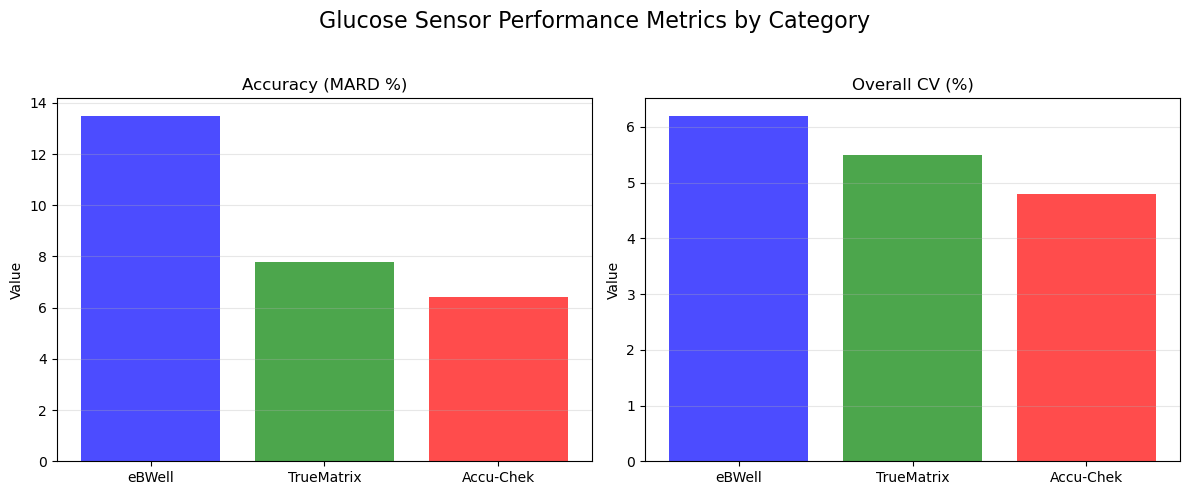

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample performance data
performance_df = pd.DataFrame({
    'eBWell': [13.5, 6.2],  # A + B for final plot
    'TrueMatrix': [7.8, 5.5],
    'Accu-Chek': [6.4, 4.8]
}, index=['Accuracy (MARD %)', 'Overall CV (%)'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

metrics = performance_df.index.tolist()
colors = ['blue', 'green', 'red']
labels = ['eBWell', 'TrueMatrix', 'Accu-Chek']
x = np.arange(len(labels))

for i, metric in enumerate(metrics):
    values = [performance_df.loc[metric, label] for label in labels]
    axs[i].bar(x, values, color=colors, alpha=0.7)
    axs[i].set_title(metric)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
    axs[i].set_ylabel('Value')
    axs[i].grid(True, axis='y', alpha=0.3)

fig.suptitle('Glucose Sensor Performance Metrics by Category', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [64]:
# Create a DataFrame of standard deviations
stddev_df = pd.DataFrame({
    'Solution': solutions,
    'eBWell SD': ebwell_std.values,
    'TrueMatrix SD': truematrix_std.values,
    'Accu-Chek SD': accuchek_std.values
})

# Set Solution as the index for clean LaTeX output
stddev_df.set_index('Solution', inplace=True)

# Display the DataFrame
print(stddev_df)


           eBWell SD  TrueMatrix SD  Accu-Chek SD
Solution                                         
A* - 70     1.057040       0.521536      0.171594
B* - 90     1.040433       0.313676      0.384522
C* - 110    1.878325       0.205866      0.269343
D* - 130    3.026962       0.868085      0.106066
F* - 1000   2.678874            NaN      0.824958


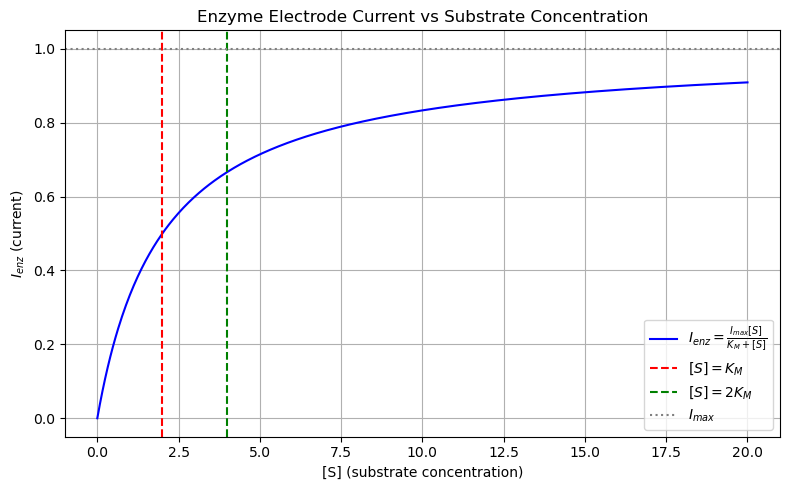

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (arbitrary units)
K_M = 2.0      # approximate KM of lactate oxidase in mmol/L
I_max = 1.0    # normalized max current

S = np.linspace(0, 20, 500)  # full physiological/pathological range

# Michaelis-Menten current equation
I_enz = I_max * S / (K_M + S)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(S, I_enz, label=r'$I_{enz} = \frac{I_{max}[S]}{K_M + [S]}$', color='blue')
plt.axvline(K_M, color='red', linestyle='--', label=r'$[S] = K_M$')
plt.axvline(2 * K_M, color='green', linestyle='--', label=r'$[S] = 2K_M$')
plt.axhline(I_max, color='gray', linestyle=':', label=r'$I_{max}$')

# Labels and title
plt.xlabel('[S] (substrate concentration)')
plt.ylabel(r'$I_{enz}$ (current)')
plt.title('Enzyme Electrode Current vs Substrate Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
